# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [15]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
# data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

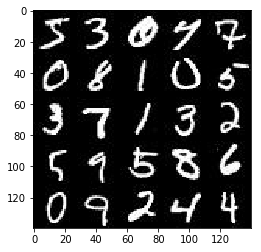

In [16]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

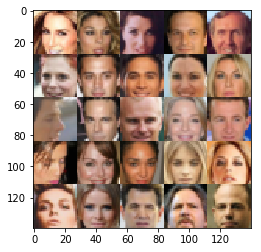

In [17]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [18]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.1
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [19]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real') 
    input_z = tf.placeholder(tf.float32, (None, z_dim), name = "input_z")
    learning_rate = tf.placeholder(tf.float32, name = "learning_rate")
    

    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [31]:
def discriminator(images, reuse=False, alpha = 0.1):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    
    with tf.variable_scope('discriminator', reuse=reuse):
        

    
        
        x = tf.layers.conv2d(images, 128, 5, strides=2, padding='same')
        x = tf.layers.batch_normalization(x, training=True)
        x = tf.maximum(alpha * x, x)
        
        x = tf.layers.conv2d(x, 256, 5, strides=2, padding='same')
        x = tf.layers.batch_normalization(x, training=True)
        x = tf.maximum(alpha * x, x)
        
        x = tf.layers.conv2d(x, 512, 5, strides=2, padding='same')
        x = tf.layers.batch_normalization(x, training=True)
        x = tf.maximum(alpha * x, x)
        
        

     
        x = tf.reshape(x, (-1,4*4*512))
        logits = tf.layers.dense(x, 1)
        out = tf.sigmoid(logits)

        return out, logits
        




"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [32]:
def generator(z, out_channel_dim, is_train=True, alpha = 0.1):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    reuse = not is_train
    
    with tf.variable_scope('generator', reuse=reuse):
        x = tf.layers.dense(z, 7*7*512)
        
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.reshape(x, (-1, 7,7, 512))      

        
        x = tf.layers.conv2d_transpose(x, 256, 5, strides=2, padding='same')
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(alpha * x, x)
        
        
        x = tf.layers.conv2d_transpose(x, 128, 5, strides=2, padding='same')
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(alpha * x, x)
        
        
        logits = tf.layers.conv2d_transpose(x, out_channel_dim, 3, strides=1, padding='same')
        out = tf.tanh(logits) 
        
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [39]:
def model_loss(input_real, input_z, out_channel_dim, alpha=0.1, smooth=0.1):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z, out_channel_dim)

    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real) * (1 - smooth)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    d_loss = d_loss_real + d_loss_fake

    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake) ))
    
    return d_loss, g_loss

    



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [44]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS, scope='generator')):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1).minimize(d_loss, var_list=d_vars)

        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [45]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    image_z = np.random.uniform(-1, 1, size=[n_images, input_z.get_shape().as_list()[-1]])

    samples = sess.run(generator(input_z, out_channel_dim, False), feed_dict={input_z: image_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=None if image_mode == 'RGB' else 'gray')
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [46]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    i = 0
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                
                
                batch_images = batch_images*2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, lr: learning_rate})
                
                if i % 100 == 0:
                    show_generator_output(sess, 36, input_z, data_shape[3], data_image_mode)
                
                if i % 10 == 0:                    
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{} :".format(epoch_i, epoch_count),
                          "Discriminator Loss: {:.4f} :".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                 
                i += 1   
 

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

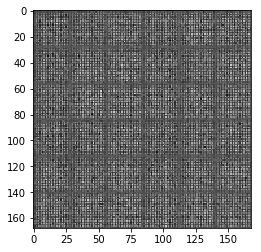

Epoch 0/2 : Discriminator Loss: 2.8273 : Generator Loss: 0.1912
Epoch 0/2 : Discriminator Loss: 0.4519 : Generator Loss: 3.2377
Epoch 0/2 : Discriminator Loss: 4.7454 : Generator Loss: 7.7091
Epoch 0/2 : Discriminator Loss: 1.5810 : Generator Loss: 1.2431
Epoch 0/2 : Discriminator Loss: 2.1587 : Generator Loss: 0.2347
Epoch 0/2 : Discriminator Loss: 2.2439 : Generator Loss: 0.1964
Epoch 0/2 : Discriminator Loss: 1.6737 : Generator Loss: 0.3879
Epoch 0/2 : Discriminator Loss: 1.7676 : Generator Loss: 0.3622
Epoch 0/2 : Discriminator Loss: 1.1849 : Generator Loss: 1.5887
Epoch 0/2 : Discriminator Loss: 1.2549 : Generator Loss: 0.6998


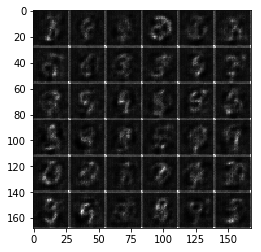

Epoch 0/2 : Discriminator Loss: 1.2585 : Generator Loss: 2.2484
Epoch 0/2 : Discriminator Loss: 1.0247 : Generator Loss: 2.1863
Epoch 0/2 : Discriminator Loss: 1.1653 : Generator Loss: 0.7130
Epoch 0/2 : Discriminator Loss: 1.6311 : Generator Loss: 0.3829
Epoch 0/2 : Discriminator Loss: 1.0018 : Generator Loss: 0.9305
Epoch 0/2 : Discriminator Loss: 1.1958 : Generator Loss: 2.8441
Epoch 0/2 : Discriminator Loss: 1.2757 : Generator Loss: 0.6686
Epoch 0/2 : Discriminator Loss: 0.7523 : Generator Loss: 1.4883
Epoch 0/2 : Discriminator Loss: 0.7605 : Generator Loss: 1.5508
Epoch 0/2 : Discriminator Loss: 0.7341 : Generator Loss: 2.0784


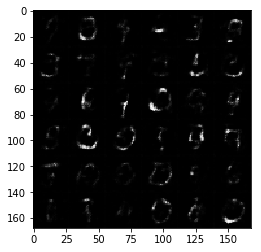

Epoch 0/2 : Discriminator Loss: 1.1962 : Generator Loss: 0.9077
Epoch 0/2 : Discriminator Loss: 0.8309 : Generator Loss: 2.0077
Epoch 0/2 : Discriminator Loss: 1.5131 : Generator Loss: 0.4986
Epoch 0/2 : Discriminator Loss: 1.4298 : Generator Loss: 2.5167
Epoch 0/2 : Discriminator Loss: 1.6081 : Generator Loss: 3.3061
Epoch 0/2 : Discriminator Loss: 1.5555 : Generator Loss: 0.5072
Epoch 0/2 : Discriminator Loss: 1.1254 : Generator Loss: 0.9190
Epoch 0/2 : Discriminator Loss: 1.7962 : Generator Loss: 0.3583
Epoch 0/2 : Discriminator Loss: 0.9504 : Generator Loss: 1.1332
Epoch 0/2 : Discriminator Loss: 1.5943 : Generator Loss: 0.4549


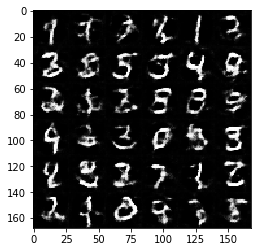

Epoch 0/2 : Discriminator Loss: 0.9852 : Generator Loss: 1.3131
Epoch 0/2 : Discriminator Loss: 1.0010 : Generator Loss: 0.9393
Epoch 0/2 : Discriminator Loss: 0.9499 : Generator Loss: 1.4810
Epoch 0/2 : Discriminator Loss: 1.5015 : Generator Loss: 0.4616
Epoch 0/2 : Discriminator Loss: 1.1377 : Generator Loss: 0.7736
Epoch 0/2 : Discriminator Loss: 1.1845 : Generator Loss: 0.7324
Epoch 0/2 : Discriminator Loss: 1.0931 : Generator Loss: 0.7685
Epoch 0/2 : Discriminator Loss: 0.9522 : Generator Loss: 1.4361
Epoch 0/2 : Discriminator Loss: 0.7859 : Generator Loss: 1.6775
Epoch 0/2 : Discriminator Loss: 1.2370 : Generator Loss: 0.6632


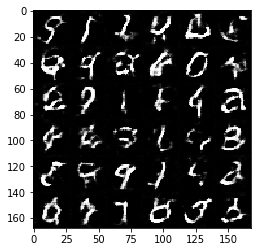

Epoch 0/2 : Discriminator Loss: 0.9708 : Generator Loss: 1.7499
Epoch 0/2 : Discriminator Loss: 0.8780 : Generator Loss: 1.3881
Epoch 0/2 : Discriminator Loss: 0.8992 : Generator Loss: 1.1282
Epoch 0/2 : Discriminator Loss: 0.9791 : Generator Loss: 1.0074
Epoch 0/2 : Discriminator Loss: 1.1207 : Generator Loss: 0.7106
Epoch 0/2 : Discriminator Loss: 1.2635 : Generator Loss: 0.6877
Epoch 0/2 : Discriminator Loss: 1.3336 : Generator Loss: 0.6447
Epoch 0/2 : Discriminator Loss: 1.1098 : Generator Loss: 1.1493
Epoch 0/2 : Discriminator Loss: 0.8633 : Generator Loss: 1.3304
Epoch 0/2 : Discriminator Loss: 1.0824 : Generator Loss: 0.8441


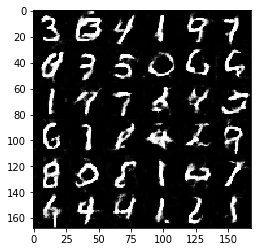

Epoch 0/2 : Discriminator Loss: 0.8136 : Generator Loss: 1.2903
Epoch 0/2 : Discriminator Loss: 1.0705 : Generator Loss: 0.8377
Epoch 0/2 : Discriminator Loss: 1.1198 : Generator Loss: 0.7569
Epoch 0/2 : Discriminator Loss: 1.6855 : Generator Loss: 0.4777
Epoch 0/2 : Discriminator Loss: 0.9931 : Generator Loss: 0.8913
Epoch 0/2 : Discriminator Loss: 1.3984 : Generator Loss: 0.5841
Epoch 0/2 : Discriminator Loss: 1.1652 : Generator Loss: 0.7211
Epoch 0/2 : Discriminator Loss: 1.0992 : Generator Loss: 2.2230
Epoch 0/2 : Discriminator Loss: 0.7910 : Generator Loss: 1.2945
Epoch 0/2 : Discriminator Loss: 0.8934 : Generator Loss: 1.0183


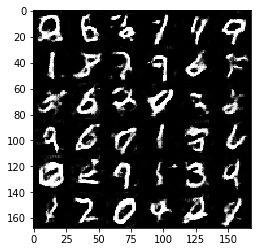

Epoch 0/2 : Discriminator Loss: 0.8203 : Generator Loss: 1.2957
Epoch 0/2 : Discriminator Loss: 0.7467 : Generator Loss: 1.4665
Epoch 0/2 : Discriminator Loss: 1.2351 : Generator Loss: 0.6832
Epoch 0/2 : Discriminator Loss: 1.0027 : Generator Loss: 0.9717
Epoch 0/2 : Discriminator Loss: 0.8826 : Generator Loss: 1.0212
Epoch 0/2 : Discriminator Loss: 0.9580 : Generator Loss: 2.4048
Epoch 0/2 : Discriminator Loss: 1.1311 : Generator Loss: 0.8318
Epoch 0/2 : Discriminator Loss: 0.8520 : Generator Loss: 1.1048
Epoch 0/2 : Discriminator Loss: 0.6431 : Generator Loss: 1.8982
Epoch 0/2 : Discriminator Loss: 1.1116 : Generator Loss: 0.7825


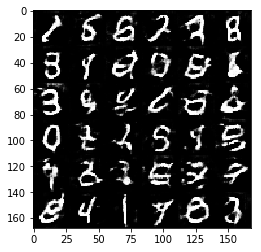

Epoch 0/2 : Discriminator Loss: 1.1344 : Generator Loss: 0.7684
Epoch 0/2 : Discriminator Loss: 0.6944 : Generator Loss: 1.6158
Epoch 0/2 : Discriminator Loss: 0.7074 : Generator Loss: 1.6245
Epoch 0/2 : Discriminator Loss: 1.2831 : Generator Loss: 0.6533
Epoch 0/2 : Discriminator Loss: 0.8220 : Generator Loss: 1.3770
Epoch 0/2 : Discriminator Loss: 0.6401 : Generator Loss: 1.6378
Epoch 0/2 : Discriminator Loss: 0.6352 : Generator Loss: 1.6411
Epoch 0/2 : Discriminator Loss: 1.5955 : Generator Loss: 0.5567
Epoch 0/2 : Discriminator Loss: 1.0661 : Generator Loss: 2.3969
Epoch 0/2 : Discriminator Loss: 1.1833 : Generator Loss: 0.7002


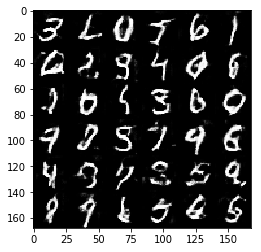

Epoch 0/2 : Discriminator Loss: 0.7877 : Generator Loss: 1.8207
Epoch 0/2 : Discriminator Loss: 0.6752 : Generator Loss: 1.5224
Epoch 0/2 : Discriminator Loss: 0.9276 : Generator Loss: 1.0137
Epoch 0/2 : Discriminator Loss: 1.1274 : Generator Loss: 0.9093
Epoch 0/2 : Discriminator Loss: 2.1894 : Generator Loss: 0.2632
Epoch 0/2 : Discriminator Loss: 1.6200 : Generator Loss: 0.5518
Epoch 0/2 : Discriminator Loss: 0.9150 : Generator Loss: 1.0770
Epoch 0/2 : Discriminator Loss: 0.9700 : Generator Loss: 1.1311
Epoch 0/2 : Discriminator Loss: 0.7529 : Generator Loss: 1.7254
Epoch 0/2 : Discriminator Loss: 1.3651 : Generator Loss: 0.6169


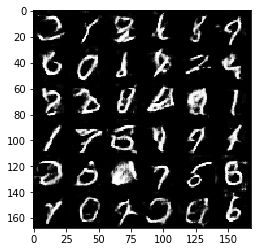

Epoch 0/2 : Discriminator Loss: 1.1438 : Generator Loss: 0.7795
Epoch 0/2 : Discriminator Loss: 1.0316 : Generator Loss: 2.0375
Epoch 0/2 : Discriminator Loss: 0.7092 : Generator Loss: 1.5612
Epoch 0/2 : Discriminator Loss: 0.7125 : Generator Loss: 1.5548
Epoch 1/2 : Discriminator Loss: 1.3972 : Generator Loss: 0.5661
Epoch 1/2 : Discriminator Loss: 1.2041 : Generator Loss: 0.6908
Epoch 1/2 : Discriminator Loss: 0.8917 : Generator Loss: 1.0420
Epoch 1/2 : Discriminator Loss: 0.8172 : Generator Loss: 1.2447
Epoch 1/2 : Discriminator Loss: 0.6604 : Generator Loss: 1.5673
Epoch 1/2 : Discriminator Loss: 1.3463 : Generator Loss: 0.7046


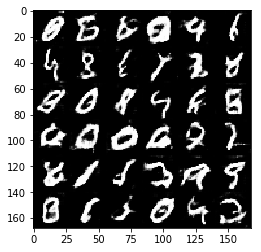

Epoch 1/2 : Discriminator Loss: 1.8068 : Generator Loss: 0.3404
Epoch 1/2 : Discriminator Loss: 1.4464 : Generator Loss: 0.5219
Epoch 1/2 : Discriminator Loss: 0.7178 : Generator Loss: 1.4187
Epoch 1/2 : Discriminator Loss: 0.8407 : Generator Loss: 1.0774
Epoch 1/2 : Discriminator Loss: 2.1993 : Generator Loss: 0.3031
Epoch 1/2 : Discriminator Loss: 0.7581 : Generator Loss: 1.3115
Epoch 1/2 : Discriminator Loss: 1.4672 : Generator Loss: 0.5859
Epoch 1/2 : Discriminator Loss: 1.1941 : Generator Loss: 0.7068
Epoch 1/2 : Discriminator Loss: 0.6340 : Generator Loss: 1.6352
Epoch 1/2 : Discriminator Loss: 0.5648 : Generator Loss: 2.0008


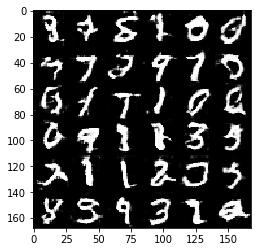

Epoch 1/2 : Discriminator Loss: 1.1803 : Generator Loss: 2.7218
Epoch 1/2 : Discriminator Loss: 0.7074 : Generator Loss: 1.4782
Epoch 1/2 : Discriminator Loss: 0.8406 : Generator Loss: 1.1705
Epoch 1/2 : Discriminator Loss: 0.5796 : Generator Loss: 1.8430
Epoch 1/2 : Discriminator Loss: 0.6152 : Generator Loss: 1.6488
Epoch 1/2 : Discriminator Loss: 1.3200 : Generator Loss: 0.6537
Epoch 1/2 : Discriminator Loss: 1.2329 : Generator Loss: 1.1069
Epoch 1/2 : Discriminator Loss: 0.8061 : Generator Loss: 1.2988
Epoch 1/2 : Discriminator Loss: 0.8153 : Generator Loss: 1.2922
Epoch 1/2 : Discriminator Loss: 0.8565 : Generator Loss: 1.1451


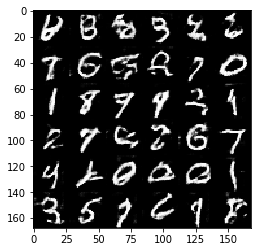

Epoch 1/2 : Discriminator Loss: 0.7272 : Generator Loss: 1.4290
Epoch 1/2 : Discriminator Loss: 0.6489 : Generator Loss: 1.6770
Epoch 1/2 : Discriminator Loss: 0.7891 : Generator Loss: 1.2637
Epoch 1/2 : Discriminator Loss: 0.7970 : Generator Loss: 1.2079
Epoch 1/2 : Discriminator Loss: 0.7997 : Generator Loss: 2.5391
Epoch 1/2 : Discriminator Loss: 0.5885 : Generator Loss: 1.7936
Epoch 1/2 : Discriminator Loss: 1.2345 : Generator Loss: 0.7644
Epoch 1/2 : Discriminator Loss: 0.5537 : Generator Loss: 1.9718
Epoch 1/2 : Discriminator Loss: 0.6652 : Generator Loss: 1.7450
Epoch 1/2 : Discriminator Loss: 0.8183 : Generator Loss: 1.2352


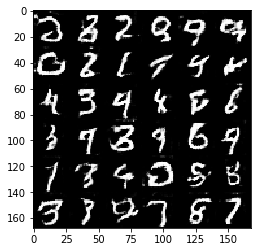

Epoch 1/2 : Discriminator Loss: 1.2271 : Generator Loss: 0.7256
Epoch 1/2 : Discriminator Loss: 0.7921 : Generator Loss: 1.2656
Epoch 1/2 : Discriminator Loss: 1.2954 : Generator Loss: 0.6806
Epoch 1/2 : Discriminator Loss: 0.7040 : Generator Loss: 1.7144
Epoch 1/2 : Discriminator Loss: 0.7286 : Generator Loss: 1.4724
Epoch 1/2 : Discriminator Loss: 0.5984 : Generator Loss: 1.8824
Epoch 1/2 : Discriminator Loss: 0.8914 : Generator Loss: 1.0794
Epoch 1/2 : Discriminator Loss: 1.8607 : Generator Loss: 0.5319
Epoch 1/2 : Discriminator Loss: 0.8207 : Generator Loss: 1.2038
Epoch 1/2 : Discriminator Loss: 0.6972 : Generator Loss: 1.4135


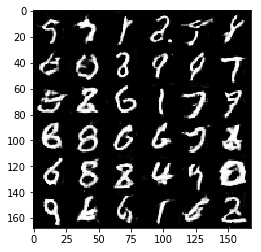

Epoch 1/2 : Discriminator Loss: 0.6534 : Generator Loss: 1.6610
Epoch 1/2 : Discriminator Loss: 0.6013 : Generator Loss: 1.9856
Epoch 1/2 : Discriminator Loss: 0.6287 : Generator Loss: 1.6798
Epoch 1/2 : Discriminator Loss: 0.6395 : Generator Loss: 2.5165
Epoch 1/2 : Discriminator Loss: 0.6563 : Generator Loss: 1.5621
Epoch 1/2 : Discriminator Loss: 0.7609 : Generator Loss: 1.4261
Epoch 1/2 : Discriminator Loss: 0.6971 : Generator Loss: 1.4294
Epoch 1/2 : Discriminator Loss: 0.5869 : Generator Loss: 1.9196
Epoch 1/2 : Discriminator Loss: 0.5569 : Generator Loss: 2.0173
Epoch 1/2 : Discriminator Loss: 0.7162 : Generator Loss: 1.5487


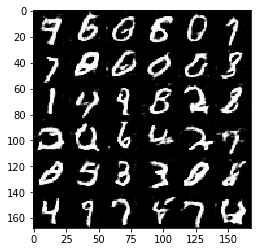

Epoch 1/2 : Discriminator Loss: 2.2060 : Generator Loss: 0.4193
Epoch 1/2 : Discriminator Loss: 0.8499 : Generator Loss: 1.3699
Epoch 1/2 : Discriminator Loss: 0.6674 : Generator Loss: 1.5438
Epoch 1/2 : Discriminator Loss: 0.8554 : Generator Loss: 1.1171
Epoch 1/2 : Discriminator Loss: 0.8794 : Generator Loss: 1.1798
Epoch 1/2 : Discriminator Loss: 0.5291 : Generator Loss: 2.1184
Epoch 1/2 : Discriminator Loss: 0.9765 : Generator Loss: 1.2575
Epoch 1/2 : Discriminator Loss: 0.6917 : Generator Loss: 1.4798
Epoch 1/2 : Discriminator Loss: 0.4750 : Generator Loss: 2.5404
Epoch 1/2 : Discriminator Loss: 0.5789 : Generator Loss: 2.2675


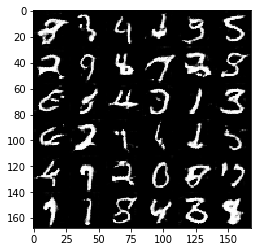

Epoch 1/2 : Discriminator Loss: 0.5775 : Generator Loss: 1.8188
Epoch 1/2 : Discriminator Loss: 0.7282 : Generator Loss: 1.3956
Epoch 1/2 : Discriminator Loss: 1.3701 : Generator Loss: 0.7044
Epoch 1/2 : Discriminator Loss: 0.7502 : Generator Loss: 1.4186
Epoch 1/2 : Discriminator Loss: 0.5351 : Generator Loss: 2.0274
Epoch 1/2 : Discriminator Loss: 0.5698 : Generator Loss: 1.9643
Epoch 1/2 : Discriminator Loss: 1.0892 : Generator Loss: 0.9003
Epoch 1/2 : Discriminator Loss: 1.2884 : Generator Loss: 0.8622
Epoch 1/2 : Discriminator Loss: 1.3681 : Generator Loss: 0.6145
Epoch 1/2 : Discriminator Loss: 0.6674 : Generator Loss: 1.4765


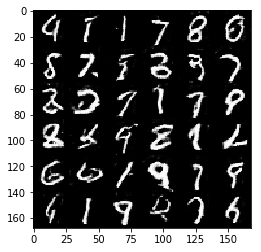

Epoch 1/2 : Discriminator Loss: 0.6154 : Generator Loss: 1.7108
Epoch 1/2 : Discriminator Loss: 0.5145 : Generator Loss: 2.2542
Epoch 1/2 : Discriminator Loss: 0.6381 : Generator Loss: 1.6698
Epoch 1/2 : Discriminator Loss: 0.5991 : Generator Loss: 2.3093
Epoch 1/2 : Discriminator Loss: 0.8597 : Generator Loss: 1.1190
Epoch 1/2 : Discriminator Loss: 0.4994 : Generator Loss: 2.5978
Epoch 1/2 : Discriminator Loss: 0.5789 : Generator Loss: 1.9748
Epoch 1/2 : Discriminator Loss: 0.7265 : Generator Loss: 1.5263
Epoch 1/2 : Discriminator Loss: 0.6599 : Generator Loss: 1.5812
Epoch 1/2 : Discriminator Loss: 0.4789 : Generator Loss: 2.3345


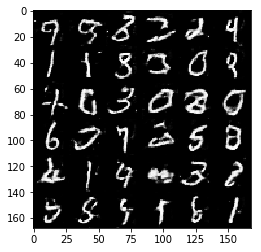

Epoch 1/2 : Discriminator Loss: 1.5851 : Generator Loss: 2.9825
Epoch 1/2 : Discriminator Loss: 0.9410 : Generator Loss: 1.2753
Epoch 1/2 : Discriminator Loss: 1.0465 : Generator Loss: 0.9391
Epoch 1/2 : Discriminator Loss: 0.6817 : Generator Loss: 1.5408
Epoch 1/2 : Discriminator Loss: 0.7862 : Generator Loss: 3.0457
Epoch 1/2 : Discriminator Loss: 1.2183 : Generator Loss: 0.8269
Epoch 1/2 : Discriminator Loss: 0.6532 : Generator Loss: 2.3626
Epoch 1/2 : Discriminator Loss: 0.5309 : Generator Loss: 2.1035


In [47]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

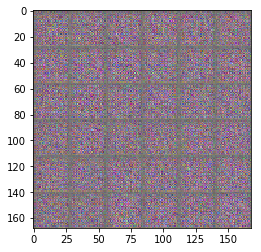

Epoch 0/1 : Discriminator Loss: 10.7105 : Generator Loss: 0.0002
Epoch 0/1 : Discriminator Loss: 1.5176 : Generator Loss: 0.4841
Epoch 0/1 : Discriminator Loss: 1.5746 : Generator Loss: 0.6894
Epoch 0/1 : Discriminator Loss: 0.9812 : Generator Loss: 1.1278
Epoch 0/1 : Discriminator Loss: 0.9003 : Generator Loss: 1.9952
Epoch 0/1 : Discriminator Loss: 1.0900 : Generator Loss: 0.9125
Epoch 0/1 : Discriminator Loss: 0.6916 : Generator Loss: 2.4910
Epoch 0/1 : Discriminator Loss: 0.9977 : Generator Loss: 1.5740
Epoch 0/1 : Discriminator Loss: 0.9115 : Generator Loss: 1.3128
Epoch 0/1 : Discriminator Loss: 1.3743 : Generator Loss: 0.6251


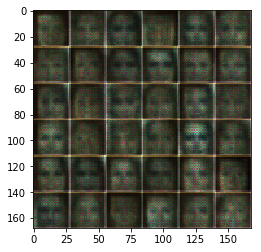

Epoch 0/1 : Discriminator Loss: 1.3453 : Generator Loss: 1.3167
Epoch 0/1 : Discriminator Loss: 2.4323 : Generator Loss: 0.1984
Epoch 0/1 : Discriminator Loss: 2.8382 : Generator Loss: 0.1163
Epoch 0/1 : Discriminator Loss: 1.2616 : Generator Loss: 1.2149
Epoch 0/1 : Discriminator Loss: 1.5313 : Generator Loss: 0.4599
Epoch 0/1 : Discriminator Loss: 1.4919 : Generator Loss: 1.4947
Epoch 0/1 : Discriminator Loss: 1.3199 : Generator Loss: 2.3031
Epoch 0/1 : Discriminator Loss: 1.6321 : Generator Loss: 0.4159
Epoch 0/1 : Discriminator Loss: 1.5089 : Generator Loss: 0.4923
Epoch 0/1 : Discriminator Loss: 1.2073 : Generator Loss: 0.8639


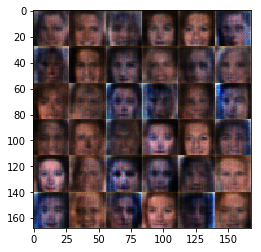

Epoch 0/1 : Discriminator Loss: 1.1514 : Generator Loss: 1.7145
Epoch 0/1 : Discriminator Loss: 0.9829 : Generator Loss: 1.0840
Epoch 0/1 : Discriminator Loss: 1.6096 : Generator Loss: 0.4361
Epoch 0/1 : Discriminator Loss: 1.5107 : Generator Loss: 0.5340
Epoch 0/1 : Discriminator Loss: 1.4232 : Generator Loss: 1.1502
Epoch 0/1 : Discriminator Loss: 1.3361 : Generator Loss: 0.6432
Epoch 0/1 : Discriminator Loss: 1.5278 : Generator Loss: 0.6922
Epoch 0/1 : Discriminator Loss: 1.2722 : Generator Loss: 0.8323
Epoch 0/1 : Discriminator Loss: 1.3793 : Generator Loss: 0.7308
Epoch 0/1 : Discriminator Loss: 1.5587 : Generator Loss: 0.4397


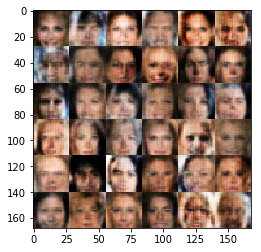

Epoch 0/1 : Discriminator Loss: 1.3587 : Generator Loss: 1.2060
Epoch 0/1 : Discriminator Loss: 1.4026 : Generator Loss: 0.5044
Epoch 0/1 : Discriminator Loss: 1.3167 : Generator Loss: 0.8726
Epoch 0/1 : Discriminator Loss: 1.4287 : Generator Loss: 0.9782
Epoch 0/1 : Discriminator Loss: 1.6158 : Generator Loss: 1.5734
Epoch 0/1 : Discriminator Loss: 1.3412 : Generator Loss: 1.0213
Epoch 0/1 : Discriminator Loss: 1.1743 : Generator Loss: 0.9201
Epoch 0/1 : Discriminator Loss: 1.1566 : Generator Loss: 0.8522
Epoch 0/1 : Discriminator Loss: 1.7354 : Generator Loss: 0.3194
Epoch 0/1 : Discriminator Loss: 1.3428 : Generator Loss: 2.0962


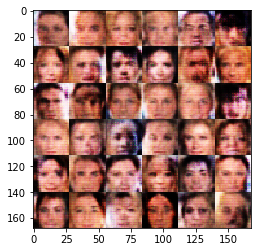

Epoch 0/1 : Discriminator Loss: 1.2313 : Generator Loss: 0.8646
Epoch 0/1 : Discriminator Loss: 0.9825 : Generator Loss: 0.8635
Epoch 0/1 : Discriminator Loss: 1.0842 : Generator Loss: 1.1463
Epoch 0/1 : Discriminator Loss: 1.4374 : Generator Loss: 0.7057
Epoch 0/1 : Discriminator Loss: 1.9246 : Generator Loss: 2.3450
Epoch 0/1 : Discriminator Loss: 1.2963 : Generator Loss: 0.6551
Epoch 0/1 : Discriminator Loss: 1.3749 : Generator Loss: 2.0568
Epoch 0/1 : Discriminator Loss: 1.4090 : Generator Loss: 2.2376
Epoch 0/1 : Discriminator Loss: 1.0917 : Generator Loss: 0.9629
Epoch 0/1 : Discriminator Loss: 0.9285 : Generator Loss: 1.4061


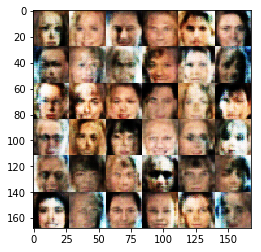

Epoch 0/1 : Discriminator Loss: 1.1935 : Generator Loss: 0.6544
Epoch 0/1 : Discriminator Loss: 1.2050 : Generator Loss: 1.4874
Epoch 0/1 : Discriminator Loss: 1.3197 : Generator Loss: 0.6211
Epoch 0/1 : Discriminator Loss: 1.2086 : Generator Loss: 1.1704
Epoch 0/1 : Discriminator Loss: 1.5142 : Generator Loss: 0.4358
Epoch 0/1 : Discriminator Loss: 1.8112 : Generator Loss: 0.2953
Epoch 0/1 : Discriminator Loss: 1.2585 : Generator Loss: 0.9216
Epoch 0/1 : Discriminator Loss: 0.8867 : Generator Loss: 1.0697
Epoch 0/1 : Discriminator Loss: 0.9428 : Generator Loss: 1.3898
Epoch 0/1 : Discriminator Loss: 1.1429 : Generator Loss: 0.7101


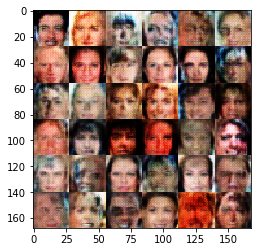

Epoch 0/1 : Discriminator Loss: 1.2541 : Generator Loss: 0.5686
Epoch 0/1 : Discriminator Loss: 1.0678 : Generator Loss: 0.7655
Epoch 0/1 : Discriminator Loss: 1.6353 : Generator Loss: 0.7461
Epoch 0/1 : Discriminator Loss: 1.9118 : Generator Loss: 0.2875
Epoch 0/1 : Discriminator Loss: 1.4291 : Generator Loss: 1.6930
Epoch 0/1 : Discriminator Loss: 1.5289 : Generator Loss: 0.4395
Epoch 0/1 : Discriminator Loss: 1.0655 : Generator Loss: 1.0220
Epoch 0/1 : Discriminator Loss: 1.0323 : Generator Loss: 1.2548
Epoch 0/1 : Discriminator Loss: 0.7334 : Generator Loss: 1.6415
Epoch 0/1 : Discriminator Loss: 1.5620 : Generator Loss: 0.3863


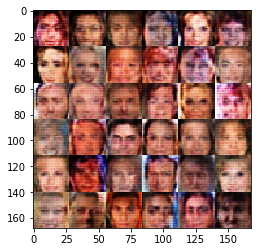

Epoch 0/1 : Discriminator Loss: 1.6021 : Generator Loss: 0.3769
Epoch 0/1 : Discriminator Loss: 1.4180 : Generator Loss: 0.6678
Epoch 0/1 : Discriminator Loss: 1.4147 : Generator Loss: 2.6653
Epoch 0/1 : Discriminator Loss: 1.1853 : Generator Loss: 0.6315
Epoch 0/1 : Discriminator Loss: 0.5310 : Generator Loss: 3.5170
Epoch 0/1 : Discriminator Loss: 1.5005 : Generator Loss: 0.5731
Epoch 0/1 : Discriminator Loss: 1.1522 : Generator Loss: 0.9888
Epoch 0/1 : Discriminator Loss: 1.2883 : Generator Loss: 0.8530
Epoch 0/1 : Discriminator Loss: 1.2041 : Generator Loss: 1.1275
Epoch 0/1 : Discriminator Loss: 1.4291 : Generator Loss: 0.5187


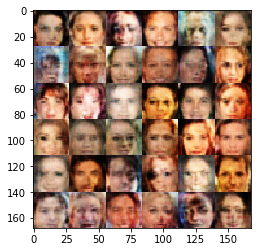

Epoch 0/1 : Discriminator Loss: 1.0798 : Generator Loss: 1.0430
Epoch 0/1 : Discriminator Loss: 1.0905 : Generator Loss: 0.9815
Epoch 0/1 : Discriminator Loss: 1.2283 : Generator Loss: 1.0340
Epoch 0/1 : Discriminator Loss: 1.6089 : Generator Loss: 0.4187
Epoch 0/1 : Discriminator Loss: 1.3927 : Generator Loss: 1.2459
Epoch 0/1 : Discriminator Loss: 1.1754 : Generator Loss: 0.7694
Epoch 0/1 : Discriminator Loss: 1.4804 : Generator Loss: 1.2027
Epoch 0/1 : Discriminator Loss: 1.1932 : Generator Loss: 0.6815
Epoch 0/1 : Discriminator Loss: 1.0099 : Generator Loss: 1.0256
Epoch 0/1 : Discriminator Loss: 1.1005 : Generator Loss: 0.9322


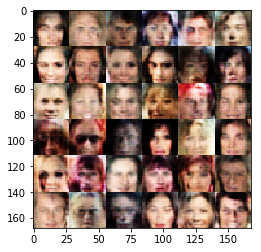

Epoch 0/1 : Discriminator Loss: 1.2398 : Generator Loss: 0.6079
Epoch 0/1 : Discriminator Loss: 1.0908 : Generator Loss: 2.0191
Epoch 0/1 : Discriminator Loss: 1.4390 : Generator Loss: 3.1045
Epoch 0/1 : Discriminator Loss: 0.9822 : Generator Loss: 0.9420
Epoch 0/1 : Discriminator Loss: 0.7399 : Generator Loss: 2.8248
Epoch 0/1 : Discriminator Loss: 1.6107 : Generator Loss: 0.4440
Epoch 0/1 : Discriminator Loss: 1.3420 : Generator Loss: 1.1303
Epoch 0/1 : Discriminator Loss: 1.3184 : Generator Loss: 0.7169
Epoch 0/1 : Discriminator Loss: 1.2463 : Generator Loss: 1.1843
Epoch 0/1 : Discriminator Loss: 1.2317 : Generator Loss: 0.7537


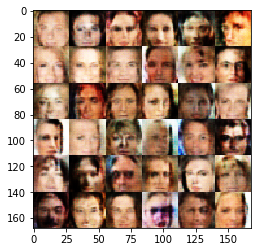

Epoch 0/1 : Discriminator Loss: 0.6190 : Generator Loss: 1.6272
Epoch 0/1 : Discriminator Loss: 1.5313 : Generator Loss: 0.4262
Epoch 0/1 : Discriminator Loss: 1.2547 : Generator Loss: 0.6623
Epoch 0/1 : Discriminator Loss: 1.3030 : Generator Loss: 0.8297
Epoch 0/1 : Discriminator Loss: 1.0450 : Generator Loss: 1.0271
Epoch 0/1 : Discriminator Loss: 1.3067 : Generator Loss: 0.5979
Epoch 0/1 : Discriminator Loss: 0.5531 : Generator Loss: 2.0872
Epoch 0/1 : Discriminator Loss: 1.3022 : Generator Loss: 0.5998
Epoch 0/1 : Discriminator Loss: 1.6269 : Generator Loss: 2.0004
Epoch 0/1 : Discriminator Loss: 1.1847 : Generator Loss: 0.6082


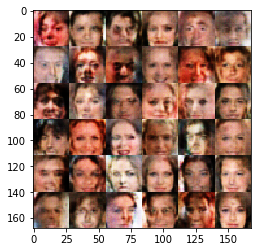

Epoch 0/1 : Discriminator Loss: 1.2359 : Generator Loss: 0.9595
Epoch 0/1 : Discriminator Loss: 1.4162 : Generator Loss: 2.6932
Epoch 0/1 : Discriminator Loss: 0.5366 : Generator Loss: 3.2915
Epoch 0/1 : Discriminator Loss: 1.1562 : Generator Loss: 1.3899
Epoch 0/1 : Discriminator Loss: 1.4054 : Generator Loss: 0.6670
Epoch 0/1 : Discriminator Loss: 1.1195 : Generator Loss: 0.8475
Epoch 0/1 : Discriminator Loss: 1.1745 : Generator Loss: 0.8262
Epoch 0/1 : Discriminator Loss: 1.1814 : Generator Loss: 0.8126
Epoch 0/1 : Discriminator Loss: 1.2291 : Generator Loss: 1.2234
Epoch 0/1 : Discriminator Loss: 1.1304 : Generator Loss: 0.9534


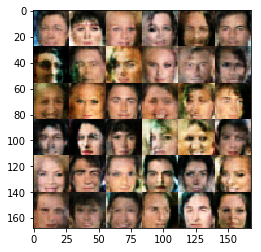

Epoch 0/1 : Discriminator Loss: 1.2064 : Generator Loss: 0.7983
Epoch 0/1 : Discriminator Loss: 1.3286 : Generator Loss: 0.6071
Epoch 0/1 : Discriminator Loss: 1.2061 : Generator Loss: 1.3282
Epoch 0/1 : Discriminator Loss: 1.0889 : Generator Loss: 1.0043
Epoch 0/1 : Discriminator Loss: 1.2494 : Generator Loss: 1.1410
Epoch 0/1 : Discriminator Loss: 1.2911 : Generator Loss: 1.8361
Epoch 0/1 : Discriminator Loss: 1.2416 : Generator Loss: 0.7154
Epoch 0/1 : Discriminator Loss: 0.9855 : Generator Loss: 1.2901
Epoch 0/1 : Discriminator Loss: 1.3466 : Generator Loss: 0.8013
Epoch 0/1 : Discriminator Loss: 1.3798 : Generator Loss: 0.5015


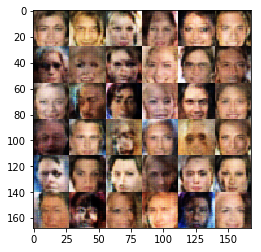

Epoch 0/1 : Discriminator Loss: 1.0071 : Generator Loss: 1.7514
Epoch 0/1 : Discriminator Loss: 1.2791 : Generator Loss: 0.5822
Epoch 0/1 : Discriminator Loss: 0.9346 : Generator Loss: 1.1480
Epoch 0/1 : Discriminator Loss: 0.8880 : Generator Loss: 0.9810
Epoch 0/1 : Discriminator Loss: 1.4367 : Generator Loss: 0.4487
Epoch 0/1 : Discriminator Loss: 1.4711 : Generator Loss: 0.4684
Epoch 0/1 : Discriminator Loss: 1.0997 : Generator Loss: 0.8692
Epoch 0/1 : Discriminator Loss: 0.8658 : Generator Loss: 1.4962
Epoch 0/1 : Discriminator Loss: 1.1019 : Generator Loss: 0.7990
Epoch 0/1 : Discriminator Loss: 0.6416 : Generator Loss: 1.7003


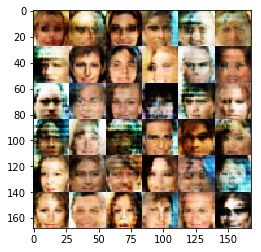

Epoch 0/1 : Discriminator Loss: 0.4839 : Generator Loss: 3.0935
Epoch 0/1 : Discriminator Loss: 1.4661 : Generator Loss: 1.4264
Epoch 0/1 : Discriminator Loss: 1.1921 : Generator Loss: 1.3519
Epoch 0/1 : Discriminator Loss: 1.2179 : Generator Loss: 0.7961
Epoch 0/1 : Discriminator Loss: 1.2238 : Generator Loss: 0.9443
Epoch 0/1 : Discriminator Loss: 1.2288 : Generator Loss: 0.6742
Epoch 0/1 : Discriminator Loss: 1.4294 : Generator Loss: 0.4854
Epoch 0/1 : Discriminator Loss: 1.3711 : Generator Loss: 0.5077
Epoch 0/1 : Discriminator Loss: 1.1497 : Generator Loss: 0.8388
Epoch 0/1 : Discriminator Loss: 1.1677 : Generator Loss: 0.7475


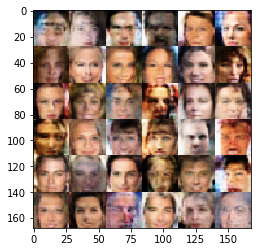

Epoch 0/1 : Discriminator Loss: 1.1339 : Generator Loss: 1.1951
Epoch 0/1 : Discriminator Loss: 1.2483 : Generator Loss: 0.6825
Epoch 0/1 : Discriminator Loss: 1.2340 : Generator Loss: 0.5887
Epoch 0/1 : Discriminator Loss: 0.5805 : Generator Loss: 2.1000
Epoch 0/1 : Discriminator Loss: 1.1001 : Generator Loss: 0.7138
Epoch 0/1 : Discriminator Loss: 1.0799 : Generator Loss: 1.9213
Epoch 0/1 : Discriminator Loss: 0.6937 : Generator Loss: 1.3929
Epoch 0/1 : Discriminator Loss: 0.4873 : Generator Loss: 3.1910
Epoch 0/1 : Discriminator Loss: 0.8091 : Generator Loss: 1.1234
Epoch 0/1 : Discriminator Loss: 0.7883 : Generator Loss: 3.2766


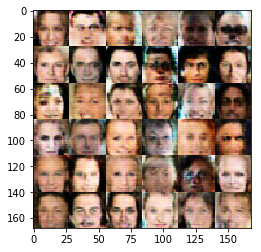

Epoch 0/1 : Discriminator Loss: 0.4557 : Generator Loss: 3.2513
Epoch 0/1 : Discriminator Loss: 0.6610 : Generator Loss: 2.8193
Epoch 0/1 : Discriminator Loss: 0.5817 : Generator Loss: 1.8077
Epoch 0/1 : Discriminator Loss: 0.4554 : Generator Loss: 2.4607
Epoch 0/1 : Discriminator Loss: 0.9968 : Generator Loss: 1.2504
Epoch 0/1 : Discriminator Loss: 1.1112 : Generator Loss: 0.9016
Epoch 0/1 : Discriminator Loss: 1.0744 : Generator Loss: 1.4294
Epoch 0/1 : Discriminator Loss: 0.6167 : Generator Loss: 1.8275
Epoch 0/1 : Discriminator Loss: 1.1463 : Generator Loss: 0.7247
Epoch 0/1 : Discriminator Loss: 0.5179 : Generator Loss: 2.2008


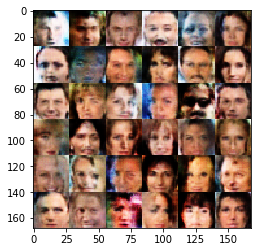

Epoch 0/1 : Discriminator Loss: 1.2713 : Generator Loss: 0.9129
Epoch 0/1 : Discriminator Loss: 1.2786 : Generator Loss: 0.6140
Epoch 0/1 : Discriminator Loss: 1.3507 : Generator Loss: 0.5813
Epoch 0/1 : Discriminator Loss: 1.1377 : Generator Loss: 0.7778
Epoch 0/1 : Discriminator Loss: 1.2178 : Generator Loss: 1.9522
Epoch 0/1 : Discriminator Loss: 1.4862 : Generator Loss: 0.4609
Epoch 0/1 : Discriminator Loss: 0.7298 : Generator Loss: 1.3316
Epoch 0/1 : Discriminator Loss: 0.4024 : Generator Loss: 3.0816
Epoch 0/1 : Discriminator Loss: 1.2500 : Generator Loss: 0.6194
Epoch 0/1 : Discriminator Loss: 1.0592 : Generator Loss: 3.0403


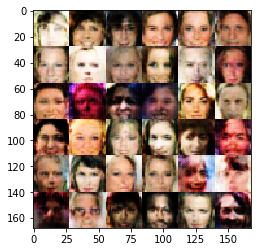

Epoch 0/1 : Discriminator Loss: 0.8919 : Generator Loss: 2.9847
Epoch 0/1 : Discriminator Loss: 0.9240 : Generator Loss: 0.9558
Epoch 0/1 : Discriminator Loss: 1.2208 : Generator Loss: 0.6504
Epoch 0/1 : Discriminator Loss: 0.4466 : Generator Loss: 3.6633
Epoch 0/1 : Discriminator Loss: 1.0473 : Generator Loss: 0.7398
Epoch 0/1 : Discriminator Loss: 0.4397 : Generator Loss: 2.6738
Epoch 0/1 : Discriminator Loss: 0.6408 : Generator Loss: 1.4823
Epoch 0/1 : Discriminator Loss: 1.0429 : Generator Loss: 0.8414
Epoch 0/1 : Discriminator Loss: 1.0774 : Generator Loss: 0.8314
Epoch 0/1 : Discriminator Loss: 1.0880 : Generator Loss: 1.0362


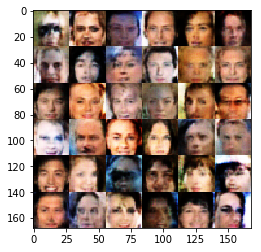

Epoch 0/1 : Discriminator Loss: 0.6566 : Generator Loss: 1.6670
Epoch 0/1 : Discriminator Loss: 0.3762 : Generator Loss: 4.8081
Epoch 0/1 : Discriminator Loss: 0.9438 : Generator Loss: 0.9978
Epoch 0/1 : Discriminator Loss: 0.8236 : Generator Loss: 1.0842
Epoch 0/1 : Discriminator Loss: 0.5021 : Generator Loss: 2.5616
Epoch 0/1 : Discriminator Loss: 0.4347 : Generator Loss: 2.5849
Epoch 0/1 : Discriminator Loss: 1.6040 : Generator Loss: 0.3912
Epoch 0/1 : Discriminator Loss: 0.4210 : Generator Loss: 2.8545
Epoch 0/1 : Discriminator Loss: 1.6021 : Generator Loss: 0.3799
Epoch 0/1 : Discriminator Loss: 0.3929 : Generator Loss: 3.3351


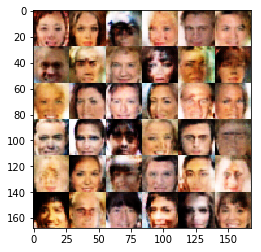

Epoch 0/1 : Discriminator Loss: 0.4938 : Generator Loss: 2.5607
Epoch 0/1 : Discriminator Loss: 1.0787 : Generator Loss: 0.8392
Epoch 0/1 : Discriminator Loss: 1.4439 : Generator Loss: 0.4923
Epoch 0/1 : Discriminator Loss: 0.8127 : Generator Loss: 1.0755
Epoch 0/1 : Discriminator Loss: 0.9697 : Generator Loss: 1.3097
Epoch 0/1 : Discriminator Loss: 0.5219 : Generator Loss: 2.0063
Epoch 0/1 : Discriminator Loss: 0.4774 : Generator Loss: 3.3303
Epoch 0/1 : Discriminator Loss: 0.9846 : Generator Loss: 1.0209
Epoch 0/1 : Discriminator Loss: 1.0995 : Generator Loss: 1.3597
Epoch 0/1 : Discriminator Loss: 0.8214 : Generator Loss: 1.3505


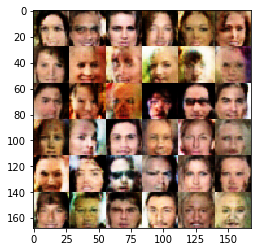

Epoch 0/1 : Discriminator Loss: 0.6266 : Generator Loss: 5.0662
Epoch 0/1 : Discriminator Loss: 0.6202 : Generator Loss: 1.5953
Epoch 0/1 : Discriminator Loss: 0.3788 : Generator Loss: 3.5354
Epoch 0/1 : Discriminator Loss: 0.7018 : Generator Loss: 1.4854
Epoch 0/1 : Discriminator Loss: 0.3896 : Generator Loss: 3.3929
Epoch 0/1 : Discriminator Loss: 0.6772 : Generator Loss: 2.1335
Epoch 0/1 : Discriminator Loss: 1.1453 : Generator Loss: 1.6411
Epoch 0/1 : Discriminator Loss: 0.6465 : Generator Loss: 1.5438
Epoch 0/1 : Discriminator Loss: 1.2904 : Generator Loss: 0.6308
Epoch 0/1 : Discriminator Loss: 0.6681 : Generator Loss: 2.1582


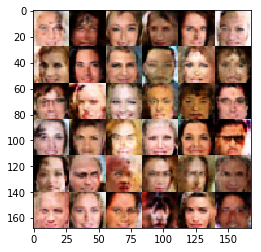

Epoch 0/1 : Discriminator Loss: 0.9829 : Generator Loss: 0.9903
Epoch 0/1 : Discriminator Loss: 0.6127 : Generator Loss: 2.5311
Epoch 0/1 : Discriminator Loss: 0.5428 : Generator Loss: 2.0189
Epoch 0/1 : Discriminator Loss: 1.3611 : Generator Loss: 0.5178
Epoch 0/1 : Discriminator Loss: 2.0116 : Generator Loss: 0.2554
Epoch 0/1 : Discriminator Loss: 0.7803 : Generator Loss: 2.1277
Epoch 0/1 : Discriminator Loss: 0.9426 : Generator Loss: 1.2132
Epoch 0/1 : Discriminator Loss: 0.6989 : Generator Loss: 2.2683
Epoch 0/1 : Discriminator Loss: 0.4201 : Generator Loss: 3.3068
Epoch 0/1 : Discriminator Loss: 1.3798 : Generator Loss: 0.5972


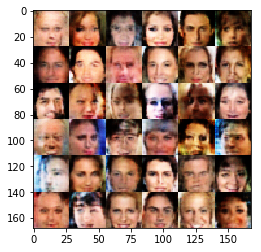

Epoch 0/1 : Discriminator Loss: 0.9762 : Generator Loss: 0.9927
Epoch 0/1 : Discriminator Loss: 1.6429 : Generator Loss: 0.3816
Epoch 0/1 : Discriminator Loss: 1.0251 : Generator Loss: 0.8147
Epoch 0/1 : Discriminator Loss: 0.5945 : Generator Loss: 5.3620
Epoch 0/1 : Discriminator Loss: 0.5606 : Generator Loss: 1.8116
Epoch 0/1 : Discriminator Loss: 1.1848 : Generator Loss: 1.7773
Epoch 0/1 : Discriminator Loss: 0.6401 : Generator Loss: 1.5830
Epoch 0/1 : Discriminator Loss: 0.8478 : Generator Loss: 1.2288
Epoch 0/1 : Discriminator Loss: 0.9485 : Generator Loss: 1.7665
Epoch 0/1 : Discriminator Loss: 0.6730 : Generator Loss: 1.4810


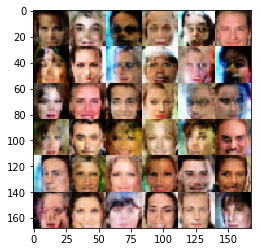

Epoch 0/1 : Discriminator Loss: 0.9965 : Generator Loss: 2.4707
Epoch 0/1 : Discriminator Loss: 1.1825 : Generator Loss: 0.6720
Epoch 0/1 : Discriminator Loss: 0.7789 : Generator Loss: 1.2589
Epoch 0/1 : Discriminator Loss: 0.7686 : Generator Loss: 1.2249
Epoch 0/1 : Discriminator Loss: 0.6306 : Generator Loss: 1.6095
Epoch 0/1 : Discriminator Loss: 0.8438 : Generator Loss: 1.0577
Epoch 0/1 : Discriminator Loss: 0.6668 : Generator Loss: 2.4540
Epoch 0/1 : Discriminator Loss: 0.4308 : Generator Loss: 3.5553
Epoch 0/1 : Discriminator Loss: 0.8552 : Generator Loss: 2.0054
Epoch 0/1 : Discriminator Loss: 1.4586 : Generator Loss: 0.4574


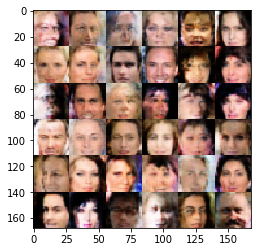

Epoch 0/1 : Discriminator Loss: 0.9795 : Generator Loss: 1.2081
Epoch 0/1 : Discriminator Loss: 0.4585 : Generator Loss: 3.1372
Epoch 0/1 : Discriminator Loss: 0.9799 : Generator Loss: 2.1698
Epoch 0/1 : Discriminator Loss: 1.0400 : Generator Loss: 0.8672
Epoch 0/1 : Discriminator Loss: 0.6169 : Generator Loss: 2.3361
Epoch 0/1 : Discriminator Loss: 0.7416 : Generator Loss: 2.0589
Epoch 0/1 : Discriminator Loss: 0.3841 : Generator Loss: 3.9517
Epoch 0/1 : Discriminator Loss: 0.5930 : Generator Loss: 1.7517
Epoch 0/1 : Discriminator Loss: 0.5294 : Generator Loss: 2.2417
Epoch 0/1 : Discriminator Loss: 1.3137 : Generator Loss: 0.5239


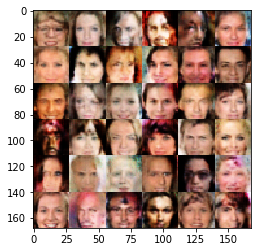

Epoch 0/1 : Discriminator Loss: 0.6962 : Generator Loss: 1.6418
Epoch 0/1 : Discriminator Loss: 0.6838 : Generator Loss: 1.8614
Epoch 0/1 : Discriminator Loss: 1.0139 : Generator Loss: 1.0177
Epoch 0/1 : Discriminator Loss: 0.6353 : Generator Loss: 2.1597
Epoch 0/1 : Discriminator Loss: 1.4924 : Generator Loss: 4.8013
Epoch 0/1 : Discriminator Loss: 0.7751 : Generator Loss: 2.2104
Epoch 0/1 : Discriminator Loss: 0.9465 : Generator Loss: 1.0134
Epoch 0/1 : Discriminator Loss: 0.6144 : Generator Loss: 2.6172
Epoch 0/1 : Discriminator Loss: 1.0678 : Generator Loss: 0.7236
Epoch 0/1 : Discriminator Loss: 0.8401 : Generator Loss: 1.2207


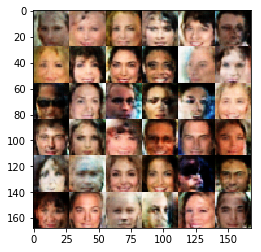

Epoch 0/1 : Discriminator Loss: 1.2066 : Generator Loss: 0.6371
Epoch 0/1 : Discriminator Loss: 0.5037 : Generator Loss: 2.5215
Epoch 0/1 : Discriminator Loss: 0.5056 : Generator Loss: 2.2774
Epoch 0/1 : Discriminator Loss: 0.8223 : Generator Loss: 1.3129
Epoch 0/1 : Discriminator Loss: 2.0729 : Generator Loss: 0.2390
Epoch 0/1 : Discriminator Loss: 0.9597 : Generator Loss: 1.8228
Epoch 0/1 : Discriminator Loss: 0.9377 : Generator Loss: 1.6696
Epoch 0/1 : Discriminator Loss: 0.8155 : Generator Loss: 1.0957
Epoch 0/1 : Discriminator Loss: 0.5111 : Generator Loss: 2.2662
Epoch 0/1 : Discriminator Loss: 0.8506 : Generator Loss: 1.2021


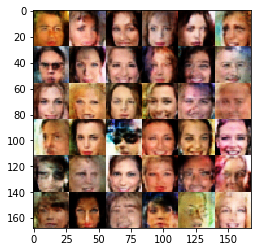

Epoch 0/1 : Discriminator Loss: 0.5298 : Generator Loss: 2.4159
Epoch 0/1 : Discriminator Loss: 0.7328 : Generator Loss: 1.4905
Epoch 0/1 : Discriminator Loss: 0.8443 : Generator Loss: 2.4923
Epoch 0/1 : Discriminator Loss: 0.7011 : Generator Loss: 1.4269
Epoch 0/1 : Discriminator Loss: 0.5594 : Generator Loss: 1.8251
Epoch 0/1 : Discriminator Loss: 0.6956 : Generator Loss: 1.4117
Epoch 0/1 : Discriminator Loss: 1.9949 : Generator Loss: 3.2405
Epoch 0/1 : Discriminator Loss: 0.4631 : Generator Loss: 3.9775
Epoch 0/1 : Discriminator Loss: 1.1164 : Generator Loss: 1.0680
Epoch 0/1 : Discriminator Loss: 0.8935 : Generator Loss: 1.1798


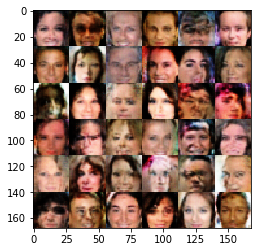

Epoch 0/1 : Discriminator Loss: 1.2034 : Generator Loss: 1.9290
Epoch 0/1 : Discriminator Loss: 0.8748 : Generator Loss: 1.0786
Epoch 0/1 : Discriminator Loss: 1.4663 : Generator Loss: 0.4530
Epoch 0/1 : Discriminator Loss: 0.4614 : Generator Loss: 2.5082
Epoch 0/1 : Discriminator Loss: 0.9933 : Generator Loss: 0.9300
Epoch 0/1 : Discriminator Loss: 1.6556 : Generator Loss: 0.4236
Epoch 0/1 : Discriminator Loss: 0.8164 : Generator Loss: 2.7768
Epoch 0/1 : Discriminator Loss: 0.5299 : Generator Loss: 1.9501
Epoch 0/1 : Discriminator Loss: 0.9072 : Generator Loss: 1.2750
Epoch 0/1 : Discriminator Loss: 0.4729 : Generator Loss: 2.8672


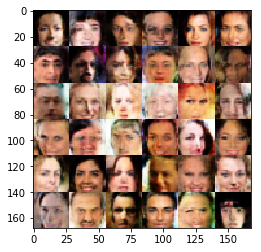

Epoch 0/1 : Discriminator Loss: 1.6046 : Generator Loss: 2.8114
Epoch 0/1 : Discriminator Loss: 0.8172 : Generator Loss: 2.2718
Epoch 0/1 : Discriminator Loss: 1.0133 : Generator Loss: 0.8071
Epoch 0/1 : Discriminator Loss: 1.1820 : Generator Loss: 2.7945
Epoch 0/1 : Discriminator Loss: 0.7800 : Generator Loss: 1.2809
Epoch 0/1 : Discriminator Loss: 1.1308 : Generator Loss: 0.9049
Epoch 0/1 : Discriminator Loss: 0.8863 : Generator Loss: 1.4999
Epoch 0/1 : Discriminator Loss: 1.6115 : Generator Loss: 0.3912
Epoch 0/1 : Discriminator Loss: 0.7086 : Generator Loss: 2.8804
Epoch 0/1 : Discriminator Loss: 0.5003 : Generator Loss: 2.8512


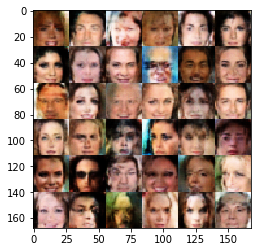

Epoch 0/1 : Discriminator Loss: 0.9723 : Generator Loss: 2.1056
Epoch 0/1 : Discriminator Loss: 1.3776 : Generator Loss: 0.5010
Epoch 0/1 : Discriminator Loss: 0.8350 : Generator Loss: 1.1159
Epoch 0/1 : Discriminator Loss: 0.7790 : Generator Loss: 1.5887
Epoch 0/1 : Discriminator Loss: 0.6837 : Generator Loss: 1.4583
Epoch 0/1 : Discriminator Loss: 0.6881 : Generator Loss: 1.4058
Epoch 0/1 : Discriminator Loss: 2.0177 : Generator Loss: 3.0811


In [48]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.